# Capstone project 1: Predicting the number of visits in US neighborhoods (continued)
# Machine Learning

**Table of Content**
- Introduction
- Machine Learning
- Conclusions

## Introduction
The goal of the machine learning part of the project is to build a model to predict the number of visitors in a cluster of CBGs, clusters that we have created in the Exploratory Data Analysis section previously. Intuitively, I would like to use the variables visitors per day of the week and those per hour of the day. Before building the predictive model, we will check correlation between the variables mentionned above - in case of a perfect correlation between the independent variable (number of visitors a.k.a. 'raw_visit_count') and the variables to predict it, we will not be able to use these last variables. 

## Inferential Analysis and Machine Learning

### Step 1: import modules and files

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

%matplotlib inline

In [13]:
#initial dataset
df = pd.read_csv('/Users/colinechabloz/Desktop/Datasets/cbg_patterns.csv')

In [8]:
#dataset after EDA (incl. cluster label)
file_path = '/Users/colinechabloz/Desktop/Datasets/Cluster/'
x_cols1_df_n = 'x_cols1_df.csv'

In [9]:
#dataset after EDA (incl. cluster label)
x_cols1_df = pd.read_csv((file_path+x_cols1_df_n), dtype={'census_block_group':str})

In [10]:
x_cols1_df.head()

,Unnamed: 0,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,...,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors,Cluster
0,0,010059508001,75122.0,18314.0,194724.0,"['chick-fil-a', 'mcdonalds', 'marathonpetroleu...","['walmart', 'mcdonalds', 'dollargeneral', 'chi...","['crossfit', 'healthmart', 'coldwellbanker']",31.920410,-85.175741,...,14,1.005950e+10,1.067030e+10,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,1.005950e+10,1.069040e+10,70.000000,2
1,1,010090506011,95649.0,38942.0,120587.0,"['shelloil', 'mcdonalds', 'chick-fil-a', 'chev...","['walmart', 'mcdonalds', 'shelloil', 'chick-fi...",[],33.863884,-86.903514,...,69,1.073011e+10,1.009051e+10,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,1.089011e+10,1.077011e+10,93.756098,2
2,2,010479572002,14009.0,3039.0,67774.0,['dollargeneral'],"['walmart', 'dollargeneral', 'mcdonalds', 'che...",['dollargeneral'],32.357337,-87.014004,...,2,1.047957e+10,1.047957e+10,63.500000,{'010479567021': 52},1,1.047957e+10,1.047957e+10,52.000000,0
3,3,010690404001,128169.0,25418.0,42684.0,"['chick-fil-a', 'samsclub', 'dollargeneral', '...","['walmart', 'dollargeneral', 'mcdonalds', 'mar...","['chick-fil-a', 'samsclub', 'olivegarden', 'mc...",31.237327,-85.426331,...,92,1.069040e+10,1.069040e+10,99.000000,"{'010690402024': 313, '010690415004': 203, '01...",23,1.069040e+10,1.031011e+10,108.173913,1
4,4,010730112101,51453.0,9499.0,18878.0,"['chevron', 'daylightdonuts', 'walmart']","['walmart', 'chevron', 'dollargeneral', 'shell...","['chevron', 'crossfit']",33.671800,-86.690610,...,37,1.009051e+10,1.073012e+10,81.513514,"{'010730045001': 140, '010730027001': 123, '01...",10,1.073005e+10,1.073002e+10,86.500000,2


In [11]:
x_cols1_df.shape

(220240, 83)

### Step 2: inferential analysis

1. Checking correlation between variables

In particular, I will be focusing on the relationship between the variable 'raw_visit_count' and the other set of variables that I plan to use to predict the number of visitors. 

In [17]:
x_cols1_df.corr()

,Unnamed: 0,raw_visit_count,raw_visitor_count,distance_from_home,latitude,longitude,12am,1am,2am,3am,...,Sunday(ratio),vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors,Cluster
Unnamed: 0,1.000000,-0.031252,-0.016909,-0.002220,0.008857,-0.000999,-0.018774,-0.017330,-0.016828,-0.016858,...,0.002459,-0.037534,0.002306,0.002878,-0.016753,-0.036288,0.002159,0.002124,-0.017879,-0.021197
raw_visit_count,-0.031252,1.000000,0.815855,0.021636,-0.137880,-0.013560,0.801545,0.771748,0.758236,0.757771,...,-0.021121,0.772645,-0.030640,-0.029067,0.350826,0.783956,-0.029292,-0.022598,0.377942,0.561064
raw_visitor_count,-0.016909,0.815855,1.000000,0.032876,-0.064720,-0.010126,0.800841,0.795832,0.789511,0.786636,...,0.048250,0.411746,-0.021338,-0.020793,0.150832,0.442170,-0.022041,-0.017845,0.190695,0.308976
distance_from_home,-0.002220,0.021636,0.032876,1.000000,-0.024045,-0.091121,0.007262,0.006492,0.006358,0.007467,...,0.224130,-0.013592,0.010200,0.013196,-0.054303,-0.020225,0.017458,0.019361,-0.084850,0.024901
latitude,0.008857,-0.137880,-0.064720,-0.024045,1.000000,0.027907,-0.136345,-0.134495,-0.135258,-0.135045,...,0.016257,-0.222386,0.196727,0.195808,-0.195269,-0.167713,0.202816,0.203476,-0.140503,-0.157428
longitude,-0.000999,-0.013560,-0.010126,-0.091121,0.027907,1.000000,-0.017530,-0.014601,-0.011096,-0.006775,...,-0.043165,-0.029710,0.290666,0.290130,-0.070391,-0.047334,0.275530,0.277665,-0.077894,-0.005287
12am,-0.018774,0.801545,0.800841,0.007262,-0.136345,-0.017530,1.000000,0.995534,0.988918,0.983846,...,0.034788,0.451766,-0.017360,-0.016778,0.329516,0.424121,-0.014868,-0.012468,0.271850,0.430391
1am,-0.017330,0.771748,0.795832,0.006492,-0.134495,-0.014601,0.995534,1.000000,0.997936,0.994846,...,0.034065,0.413901,-0.014351,-0.013903,0.325102,0.379374,-0.011774,-0.009826,0.258257,0.411952
2am,-0.016828,0.758236,0.789511,0.006358,-0.135258,-0.011096,0.988918,0.997936,1.000000,0.998062,...,0.032551,0.401874,-0.010072,-0.009716,0.324307,0.363562,-0.007495,-0.005682,0.252388,0.405144
3am,-0.016858,0.757771,0.786636,0.007467,-0.135045,-0.006775,0.983846,0.994846,0.998062,1.000000,...,0.033705,0.403155,-0.010114,-0.009737,0.326307,0.363086,-0.007729,-0.005927,0.250625,0.407117


**Observations**

- Correlation between 'raw_visit_count' and variable representing popularity by day

The variables ['Monday',...,'Sunday'] are highly, almost fully, correlated to 'raw_visit_count'. This is surprising and unexpected. There is a risk that I will not use these variables to predict the number of visitors in the model since they will not bring any additional information. We will explore this below. 

- Correlation between 'raw_visit_count' and variable representing popularity by hour

There is a positive and quite important correlation between the variables ['12am',...,'11pm'] and 'raw_visit_count'. This allows the possibility to use these variables in the model. 

2. Digging the unexpected high correlation between 'raw_visit_count' and popularity by day variables

In [22]:
df['duration'] = df['date_range_end'] - df['date_range_start']
df['duration_days'] = df['duration'] / 86400

In [23]:
cols = ['census_block_group', 'raw_visit_count', 'popularity_by_hour','popularity_by_day', 'duration_days']

In [24]:
row_index=200

In [25]:
df.loc[row_index, cols]

census_block_group                                          3.60595e+11
raw_visit_count                                                   14935
popularity_by_hour    [1287,1224,1235,1208,1219,1225,1324,1904,1659,...
popularity_by_day     {"Monday":2191,"Tuesday":2472,"Wednesday":2498...
duration_days                                                        31
Name: 200, dtype: object

In [27]:
np.sum(list(eval(df.loc[row_index, 'popularity_by_day']).values()))

14935

**Observations**

We see that the sum of visitors on Monday, Tuesday (N=14'935) until Sunday equals exactly the amount of visitors 'raw_visit_count'. This explains the perfect correlation identified above. To conclude, we will not be able to use the popularity by day to predict the number of visitors. 

3. Relation between popularity_by_hour and raw_visit_count

In [14]:
df.loc[:, 'sum_popularity_by_hour'] = df['popularity_by_hour'].apply(lambda x: np.sum(list(eval(x))))

Text(0.5, 1.0, 'Relation popularity by hour and raw visit count')

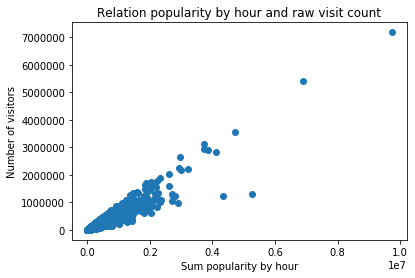

In [28]:
plt.scatter(df.sum_popularity_by_hour, df.raw_visit_count)
plt.xlabel('Sum popularity by hour')
plt.ylabel('Number of visitors')
plt.title('Relation popularity by hour and raw visit count')

**Observations**

This graph confirms the result of the correlation analysis above: it seems there is a good correlation, but not perfect. We will use the variables representing the popularity by hour to predict the number of visitors. 

### Step 3: Predict the montly visitors using the hourly visits

### Cluster 0
1. Define variables for model

In [30]:
#cluster 0
x_cols1_df_0 = x_cols1_df[x_cols1_df['Cluster'] == 0]

In [34]:
#create variable containing pop. by hour and raw visit count
df_predict_0 = x_cols1_df_0[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', 'raw_visit_count']]

In [35]:
df_predict_0.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,raw_visit_count
2,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,...,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,14009.0
7,2459.0,2397.0,2363.0,2385.0,2466.0,2442.0,2509.0,3292.0,2007.0,1899.0,...,3070.0,2974.0,3558.0,3269.0,2878.0,2753.0,2853.0,2655.0,2514.0,23534.0
8,673.0,554.0,484.0,439.0,450.0,476.0,583.0,1313.0,942.0,939.0,...,1898.0,2122.0,2190.0,1930.0,1698.0,1405.0,1263.0,1032.0,775.0,20349.0
9,755.0,729.0,701.0,661.0,640.0,686.0,660.0,716.0,716.0,715.0,...,688.0,732.0,713.0,740.0,775.0,747.0,743.0,765.0,769.0,5102.0
10,1973.0,1874.0,1778.0,1770.0,1894.0,2321.0,3104.0,3625.0,3015.0,2560.0,...,3679.0,4012.0,4579.0,4055.0,3447.0,3013.0,2794.0,2428.0,2109.0,41903.0


In [36]:
y_0 = df_predict_0["raw_visit_count"]

In [38]:
X_0 = np.asmatrix(np.array(df_predict_0[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']]))

2. Let's train a Linear Regressor

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.9512127143160659


In [41]:
for feat, value in zip(df_predict_0[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],reg_all.coef_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 5.03416918384811
Importance of feature: 1am: -4.76941488586115
Importance of feature: 2am: -8.212347633881139
Importance of feature: 3am: -7.996574244164682
Importance of feature: 4am: -0.22878218606635536
Importance of feature: 5am: 0.6142979521161288
Importance of feature: 6am: 1.9366437928490423
Importance of feature: 7am: 0.13875414608644066
Importance of feature: 8am: 1.8543034857306684
Importance of feature: 9am: -0.21646184731616935
Importance of feature: 10am: -0.8648098915803373
Importance of feature: 11am: -1.283001164831284
Importance of feature: 12pm: -0.6472179377756163
Importance of feature: 1pm: 2.5838510142162177
Importance of feature: 2pm: 0.33131045662073966
Importance of feature: 3pm: 0.2646237029908025
Importance of feature: 4pm: 3.5246683279583055
Importance of feature: 5pm: 1.195922674079334
Importance of feature: 6pm: 1.5032349338652753
Importance of feature: 7pm: 1.293332511061174
Importance of feature: 8pm: 0.02624816763090365
Impor

Text(0.5, 1.0, 'Relation y_pred and y_test')

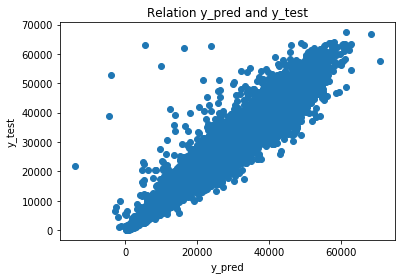

In [43]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

3. Now, let's train a decision tree

In [45]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R^2: {}".format(regressor.score(X_test, y_test)))

R^2: 0.9128725525205075


In [46]:
for feat, value in zip(df_predict_0[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],regressor.feature_importances_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 0.0016842008034536223
Importance of feature: 1am: 0.002063446636244811
Importance of feature: 2am: 0.007322579800565549
Importance of feature: 3am: 0.023566829798486063
Importance of feature: 4am: 0.004898193603571712
Importance of feature: 5am: 0.002469166743593373
Importance of feature: 6am: 0.004373595049956106
Importance of feature: 7am: 0.00254065482444969
Importance of feature: 8am: 0.005871673103533637
Importance of feature: 9am: 0.003203449425215531
Importance of feature: 10am: 0.0022529600998812123
Importance of feature: 11am: 0.0015637076071216597
Importance of feature: 12pm: 0.0013599440065906123
Importance of feature: 1pm: 0.0027194812734324743
Importance of feature: 2pm: 0.004648751028846569
Importance of feature: 3pm: 0.0069418932403755304
Importance of feature: 4pm: 0.8854157590118017
Importance of feature: 5pm: 0.0067075817556592095
Importance of feature: 6pm: 0.01276404822411229
Importance of feature: 7pm: 0.002342320711267611
Importance of

**Observations**

Importance of feature: 4pm: 0.8854157590118017

This is the most important feature in cluster 0. 

Text(0.5, 1.0, 'Relation y_pred and y_test')

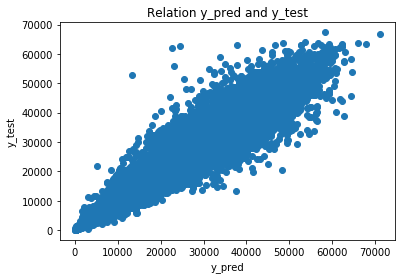

In [47]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

### Cluster 1
1. Define variables for model

In [48]:
#cluster 1
x_cols1_df_1 = x_cols1_df[x_cols1_df['Cluster'] == 1]

In [49]:
#create variable containing pop. by hour and raw visit count
df_predict_1 = x_cols1_df_1[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', 'raw_visit_count']]

In [50]:
df_predict_1.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,raw_visit_count
3,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,...,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,128169.0
5,7153.0,6710.0,6479.0,6556.0,7460.0,8527.0,12533.0,12134.0,10674.0,10991.0,...,17044.0,17709.0,19051.0,16422.0,14238.0,12661.0,10808.0,9491.0,8239.0,152557.0
20,11008.0,10329.0,9942.0,9608.0,10085.0,11133.0,13557.0,19702.0,21099.0,21782.0,...,23832.0,22578.0,21859.0,19258.0,16761.0,15482.0,13932.0,12441.0,11925.0,206500.0
33,5248.0,5041.0,4816.0,4890.0,5253.0,6070.0,8347.0,14435.0,14522.0,10490.0,...,20418.0,17130.0,17249.0,15426.0,11408.0,10422.0,8658.0,6729.0,5792.0,154211.0
35,7593.0,6959.0,6760.0,7194.0,8826.0,10076.0,13178.0,19987.0,15613.0,15360.0,...,21167.0,21112.0,20986.0,19773.0,17305.0,15380.0,13104.0,10798.0,8824.0,242700.0


In [51]:
y_1 = df_predict_1["raw_visit_count"]

In [52]:
X_1 = np.asmatrix(np.array(df_predict_1[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']]))

2. Let's train a Linear Regressor

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.775992342713788


In [55]:
for feat, value in zip(df_predict_1[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],reg_all.coef_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 31.5433200679224
Importance of feature: 1am: -27.563029602818524
Importance of feature: 2am: -2.64016444277779
Importance of feature: 3am: -6.587508291869127
Importance of feature: 4am: -5.227579660342553
Importance of feature: 5am: 6.15889589378485
Importance of feature: 6am: 2.428729162897479
Importance of feature: 7am: 0.23780274258528689
Importance of feature: 8am: 0.7314473011234122
Importance of feature: 9am: 1.370255465414616
Importance of feature: 10am: -1.566208724486264
Importance of feature: 11am: 1.8795445817567695
Importance of feature: 12pm: -5.271489290405433
Importance of feature: 1pm: 5.589405742577848
Importance of feature: 2pm: -0.8213000573634346
Importance of feature: 3pm: 0.04509843981169892
Importance of feature: 4pm: -0.9927796514739065
Importance of feature: 5pm: 5.4567019004764
Importance of feature: 6pm: 2.5794585308806726
Importance of feature: 7pm: -3.176119312807733
Importance of feature: 8pm: -0.48403464425996034
Importance of

Text(0.5, 1.0, 'Relation y_pred and y_test')

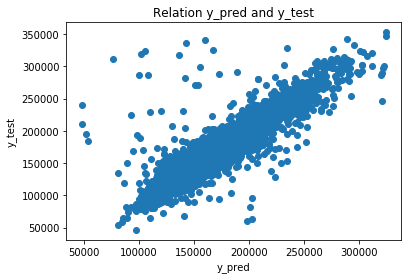

In [56]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

3. Now, let's train a decision tree

In [57]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R^2: {}".format(regressor.score(X_test, y_test)))

R^2: 0.7184092477638141


In [58]:
for feat, value in zip(df_predict_1[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],regressor.feature_importances_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 0.030929558546034103
Importance of feature: 1am: 0.012912177972125202
Importance of feature: 2am: 0.08189308498480576
Importance of feature: 3am: 0.05316728065431079
Importance of feature: 4am: 0.0063190296432176045
Importance of feature: 5am: 0.010511269871377092
Importance of feature: 6am: 0.07130354388369106
Importance of feature: 7am: 0.008426556668183907
Importance of feature: 8am: 0.011470666888436112
Importance of feature: 9am: 0.00885403802248396
Importance of feature: 10am: 0.004769162390536948
Importance of feature: 11am: 0.003075715493487247
Importance of feature: 12pm: 0.0099602328794268
Importance of feature: 1pm: 0.017488179454772025
Importance of feature: 2pm: 0.006502682932745665
Importance of feature: 3pm: 0.005992112765937576
Importance of feature: 4pm: 0.015558280374225512
Importance of feature: 5pm: 0.5438409436212323
Importance of feature: 6pm: 0.02151746875074534
Importance of feature: 7pm: 0.006555866123740419
Importance of feature: 8

**Observations**

Importance of feature: 5pm: 0.5438409436212323

This is the most important feature in cluster 1. 

Text(0.5, 1.0, 'Relation y_pred and y_test')

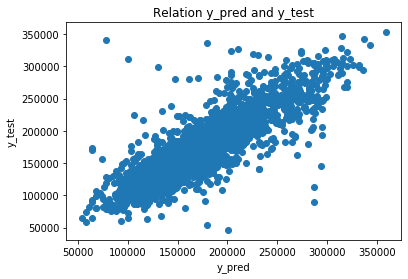

In [59]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

### Cluster 3
1. Define variables for model

In [73]:
#cluster 3
x_cols1_df_3 = x_cols1_df[x_cols1_df['Cluster'] == 3]

In [74]:
#create variable containing pop. by hour and raw visit count
df_predict_3 = x_cols1_df_3[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', 'raw_visit_count']]

In [75]:
df_predict_3.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,raw_visit_count
2477,104601.0,109815.0,115864.0,108161.0,105078.0,101786.0,100041.0,100318.0,102753.0,96804.0,...,86006.0,85460.0,77028.0,65060.0,78453.0,77502.0,78151.0,82636.0,96003.0,1766557.0
6121,82002.0,85178.0,76035.0,81295.0,73063.0,71427.0,71834.0,74280.0,72829.0,77430.0,...,75520.0,72698.0,73016.0,70811.0,74365.0,84790.0,81123.0,77216.0,76815.0,1617259.0
6319,48653.0,40563.0,37784.0,41316.0,51717.0,68780.0,95128.0,115131.0,123875.0,127082.0,...,138163.0,142694.0,141695.0,130372.0,111683.0,96088.0,79683.0,64080.0,57082.0,1094645.0
6945,34819.0,26659.0,24396.0,24003.0,27726.0,45392.0,78896.0,127695.0,175190.0,178106.0,...,221298.0,230166.0,223961.0,169351.0,121888.0,95631.0,85488.0,75346.0,53087.0,2159396.0
14667,69453.0,58662.0,53958.0,52370.0,53622.0,58422.0,67601.0,81364.0,91135.0,91169.0,...,104348.0,106296.0,108525.0,106599.0,105817.0,106249.0,107319.0,99024.0,84627.0,861977.0


In [76]:
y_3 = df_predict_3["raw_visit_count"]

In [77]:
X_3 = np.asmatrix(np.array(df_predict_3[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']]))

2. Let's train a Linear Regressor

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.9042998645749013


In [80]:
for feat, value in zip(df_predict_3[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],reg_all.coef_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: -15.442983423125522
Importance of feature: 1am: 0.022613308997461168
Importance of feature: 2am: 32.595339875610705
Importance of feature: 3am: 50.80639176443467
Importance of feature: 4am: -151.09223169923956
Importance of feature: 5am: 96.49231915587168
Importance of feature: 6am: -4.1215031499654495
Importance of feature: 7am: -0.9233989412860306
Importance of feature: 8am: 23.157245907794984
Importance of feature: 9am: -32.17308750479603
Importance of feature: 10am: -17.667762686343412
Importance of feature: 11am: 26.544099448356068
Importance of feature: 12pm: -32.07394166091512
Importance of feature: 1pm: 47.42553205979796
Importance of feature: 2pm: -5.116415437456753
Importance of feature: 3pm: 34.320114459695425
Importance of feature: 4pm: -80.2465667067501
Importance of feature: 5pm: 54.650295619276605
Importance of feature: 6pm: -15.776008249878645
Importance of feature: 7pm: -24.287284898138818
Importance of feature: 8pm: 24.457469864922558
Impo

Text(0.5, 1.0, 'Relation y_pred and y_test')

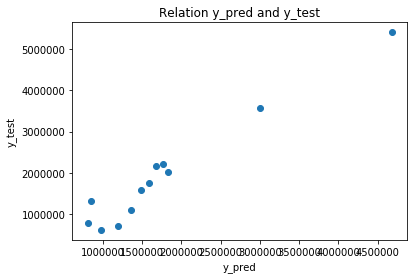

In [81]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

3. Now, let's train a decision tree

In [82]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R^2: {}".format(regressor.score(X_test, y_test)))

R^2: 0.5896582455916113


In [83]:
for feat, value in zip(df_predict_3[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],regressor.feature_importances_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 0.0
Importance of feature: 1am: 0.6688802568981007
Importance of feature: 2am: 0.0001851865588485825
Importance of feature: 3am: 0.24735162658160806
Importance of feature: 4am: 0.03429006841285066
Importance of feature: 5am: 0.0022342110267252057
Importance of feature: 6am: 0.0
Importance of feature: 7am: 0.014056958133904262
Importance of feature: 8am: 0.0016076642065271363
Importance of feature: 9am: 5.916578740988482e-05
Importance of feature: 10am: 0.003025204319604481
Importance of feature: 11am: 0.001429164082518062
Importance of feature: 12pm: 0.003693402822226491
Importance of feature: 1pm: 0.0012535352659028905
Importance of feature: 2pm: 9.620097341514136e-05
Importance of feature: 3pm: 0.0003020282838299088
Importance of feature: 4pm: 0.0
Importance of feature: 5pm: 0.0010655574671716403
Importance of feature: 6pm: 0.0
Importance of feature: 7pm: 2.9605452228988332e-05
Importance of feature: 8pm: 0.016731719683682672
Importance of feature: 9pm: 0

**Observations**

Importance of feature: 1am: 0.6688802568981007

Importance of feature: 3am: 0.24735162658160806

This is the most important feature in cluster 3. 

Text(0.5, 1.0, 'Relation y_pred and y_test')

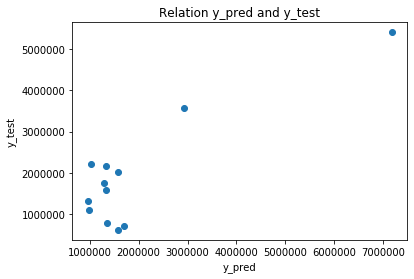

In [84]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

### Cluster 4
1. Define variables for model

In [85]:
#cluster 4
x_cols1_df_4 = x_cols1_df[x_cols1_df['Cluster'] == 4]

In [86]:
#create variable containing pop. by hour and raw visit count
df_predict_4 = x_cols1_df_4[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', 'raw_visit_count']]

In [87]:
df_predict_4.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,raw_visit_count
48,13038.0,8948.0,7017.0,6782.0,7359.0,8717.0,11580.0,18252.0,23289.0,25990.0,...,34704.0,35730.0,32965.0,29159.0,26638.0,23982.0,22076.0,19735.0,16830.0,226691.0
49,7884.0,6947.0,6562.0,6407.0,7669.0,10385.0,14125.0,21213.0,25900.0,29315.0,...,32889.0,32993.0,31429.0,26532.0,21099.0,16407.0,14294.0,11861.0,9507.0,274266.0
292,6976.0,5491.0,4990.0,4651.0,5315.0,9233.0,19488.0,31822.0,35115.0,35440.0,...,41686.0,44162.0,43106.0,34029.0,26210.0,19921.0,16191.0,12724.0,9329.0,430828.0
293,4624.0,3482.0,3224.0,3379.0,4479.0,7414.0,14961.0,23027.0,22714.0,19858.0,...,27954.0,33887.0,35832.0,31117.0,24498.0,18526.0,14232.0,9931.0,6510.0,329936.0
299,32288.0,31525.0,31571.0,31461.0,32349.0,34605.0,44466.0,50260.0,43309.0,40637.0,...,45624.0,48489.0,49066.0,47569.0,42565.0,39744.0,37600.0,35476.0,33395.0,341965.0


In [88]:
y_4 = df_predict_4["raw_visit_count"]

In [89]:
X_4 = np.asmatrix(np.array(df_predict_4[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']]))

2. Let's train a Linear Regressor

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size = 0.2, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.5961651778790349


In [92]:
for feat, value in zip(df_predict_4[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],reg_all.coef_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 36.403437378770604
Importance of feature: 1am: -13.411153379439268
Importance of feature: 2am: 1.3480754469455194
Importance of feature: 3am: 14.950909119567516
Importance of feature: 4am: -46.14873174589184
Importance of feature: 5am: 24.08579896092716
Importance of feature: 6am: -2.7465715718690995
Importance of feature: 7am: 1.8576556697824
Importance of feature: 8am: -0.2468933821697119
Importance of feature: 9am: 9.400652923682788
Importance of feature: 10am: -15.885462874880522
Importance of feature: 11am: 11.114632151297062
Importance of feature: 12pm: -8.067574009353457
Importance of feature: 1pm: 6.731833136015158
Importance of feature: 2pm: 1.6224987224125695
Importance of feature: 3pm: -1.2165196261733104
Importance of feature: 4pm: -3.550833578138279
Importance of feature: 5pm: 6.190386578465244
Importance of feature: 6pm: 5.163468135597823
Importance of feature: 7pm: -12.016715275345922
Importance of feature: 8pm: 5.862181623170041
Importance o

Text(0.5, 1.0, 'Relation y_pred and y_test')

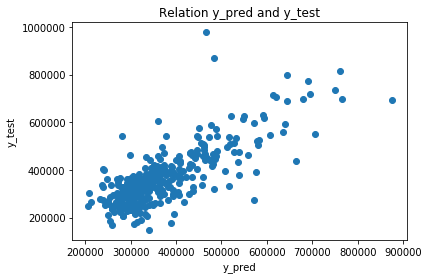

In [93]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

3. Now, let's train a decision tree

In [94]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R^2: {}".format(regressor.score(X_test, y_test)))

R^2: 0.4611330498449747


In [95]:
for feat, value in zip(df_predict_4[['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']],regressor.feature_importances_):
    print("Importance of feature: {0}: {1}".format(feat, value))

Importance of feature: 12am: 0.05419192514086702
Importance of feature: 1am: 0.004671470268699711
Importance of feature: 2am: 0.07812097058534473
Importance of feature: 3am: 0.02646576428477786
Importance of feature: 4am: 0.009470161279509406
Importance of feature: 5am: 0.01834773420668826
Importance of feature: 6am: 0.02444987994938382
Importance of feature: 7am: 0.011770908173861862
Importance of feature: 8am: 0.4056820763277926
Importance of feature: 9am: 0.08308106756197549
Importance of feature: 10am: 0.00526349616610147
Importance of feature: 11am: 0.0049744891729207675
Importance of feature: 12pm: 0.006383175379045065
Importance of feature: 1pm: 0.006664039930730706
Importance of feature: 2pm: 0.004789582510752705
Importance of feature: 3pm: 0.01766266713132205
Importance of feature: 4pm: 0.05536899353660672
Importance of feature: 5pm: 0.1048481090023278
Importance of feature: 6pm: 0.012246653786361788
Importance of feature: 7pm: 0.007508532805541343
Importance of feature: 8pm: 

**Observations**

Importance of feature: 8am: 0.4056820763277926

Importance of feature: 5pm: 0.1048481090023278

This is the most important feature in cluster 4. 

Text(0.5, 1.0, 'Relation y_pred and y_test')

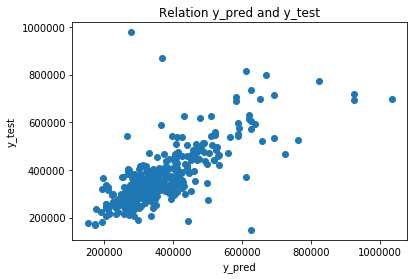

In [96]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Relation y_pred and y_test')

- filter cluster = 0 
- split train (70%) and test (20%) and validation (10%) to be used at the end to perform new predictions and create plots other than when training/testing the model
- with train set: regression y .. X ... parameters (decide metrics: eg; minimum root mean squared error)
- with test set : predict (same regression)
- measure performance of regression with train and the performance of regression with test 
- compare performances and evaluate the quality of model